In [1]:
# !pip install kaggle


In [2]:
# from google.colab import files
# files.upload()  # Use this to upload kaggle.json


In [3]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification --unzip

In [5]:
import os
import shutil

initial_epochs = 25

# Paths to the current dataset
train_dir = "dataset/train"
test_dir = "dataset/test"

# Paths to the new dataset structure
new_train_dir = "dataset_reorganized/train"
new_test_dir = "dataset_reorganized/test"

# Create new directories for fresh and rotten classes
os.makedirs(os.path.join(new_train_dir, 'fresh'), exist_ok=True)
os.makedirs(os.path.join(new_train_dir, 'rotten'), exist_ok=True)
os.makedirs(os.path.join(new_test_dir, 'fresh'), exist_ok=True)
os.makedirs(os.path.join(new_test_dir, 'rotten'), exist_ok=True)

# Mapping of current classes to new classes
class_to_category = {
    'freshapples': 'fresh',
    'freshbanana': 'fresh',
    'freshoranges': 'fresh',
    'rottenapples': 'rotten',
    'rottenbanana': 'rotten',
    'rottenoranges': 'rotten',
}

# Function to reorganize the dataset
def reorganize_dataset(source_dir, target_dir):
    for class_name, category in class_to_category.items():
        class_path = os.path.join(source_dir, class_name)
        target_path = os.path.join(target_dir, category)

        if not os.path.exists(class_path):
            print(f"Class directory {class_path} does not exist. Skipping.")
            continue

        # Move files to the new structure
        for file_name in os.listdir(class_path):
            source_file = os.path.join(class_path, file_name)
            target_file = os.path.join(target_path, file_name)
            shutil.copy(source_file, target_file)

# Reorganize training data
print("Reorganizing training data...")
reorganize_dataset(train_dir, new_train_dir)

# Reorganize test data
print("Reorganizing test data...")
reorganize_dataset(test_dir, new_test_dir)

print("Dataset successfully split into rotten and fresh categories!")


Reorganizing training data...
Reorganizing test data...
Dataset successfully split into rotten and fresh categories!


In [6]:
new_train_dir = "dataset_reorganized/train"
new_test_dir = "dataset_reorganized/test"

print("Fresh samples in training:", len(os.listdir(os.path.join(new_train_dir, 'fresh'))))
print("Rotten samples in training:", len(os.listdir(os.path.join(new_train_dir, 'rotten'))))
print("Fresh samples in testing:", len(os.listdir(os.path.join(new_test_dir, 'fresh'))))
print("Rotten samples in testing:", len(os.listdir(os.path.join(new_test_dir, 'rotten'))))


Fresh samples in training: 4740
Rotten samples in training: 6161
Fresh samples in testing: 1164
Rotten samples in testing: 1534


In [7]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Paths to the reorganized dataset
train_dir = "dataset_reorganized/train"
test_dir = "dataset_reorganized/test"

# Step 2: Check the number of files in each class
print("Training Data Summary:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    num_files = len(os.listdir(class_path))
    print(f"Class '{class_name}' contains {num_files} files.")

print("\nTesting Data Summary:")
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    num_files = len(os.listdir(class_path))
    print(f"Class '{class_name}' contains {num_files} files.")

# Step 3: List a few files from one of the classes in the training set
sample_class = os.listdir(train_dir)[0]  # Pick the first class (e.g., 'fresh')
sample_class_path = os.path.join(train_dir, sample_class)
print(f"\nSample files in training class '{sample_class}':")
print(os.listdir(sample_class_path)[:10])  # Print first 10 files

# Step 3 (Testing Set): List a few files from one of the classes in the test set
sample_test_class = os.listdir(test_dir)[0]  # Pick the first class (e.g., 'fresh')
sample_test_class_path = os.path.join(test_dir, sample_test_class)
print(f"\nSample files in testing class '{sample_test_class}':")
print(os.listdir(sample_test_class_path)[:10])  # Print first 10 files


Training Data Summary:
Class 'fresh' contains 4740 files.
Class 'rotten' contains 6161 files.

Testing Data Summary:
Class 'fresh' contains 1164 files.
Class 'rotten' contains 1534 files.

Sample files in training class 'fresh':
['rotated_by_15_Screen Shot 2018-06-12 at 9.50.12 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.18.51 PM.png', 'rotated_by_60_Screen Shot 2018-06-12 at 9.42.03 PM.png', 'rotated_by_30_Screen Shot 2018-06-12 at 10.00.49 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 11.55.42 PM.png', 'Screen Shot 2018-06-08 at 5.24.12 PM.png', 'vertical_flip_Screen Shot 2018-06-12 at 10.02.01 PM.png', 'translation_Screen Shot 2018-06-12 at 10.06.38 PM.png', 'translation_Screen Shot 2018-06-08 at 5.04.24 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.13.18 PM.png']

Sample files in testing class 'fresh':
['Screen Shot 2018-06-08 at 5.02.43 PM.png', 'saltandpepper_Screen Shot 2018-06-08 at 5.10.11 PM.png', 'rotated_by_75_Screen Shot 2018-06-12 at 9.58.07 PM.png', 'ro

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=30,         # Rotate images up to 30 degrees
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    validation_split=0.2       # Reserve 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test set

# Create data generators for binary classification
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),    # ResNet-50 requires input size 224x224
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',       # Binary classification
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'        # Binary classification
)


Found 8721 images belonging to 2 classes.
Found 2180 images belonging to 2 classes.
Found 2698 images belonging to 2 classes.


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model for initial training

# Add custom layers on top of ResNet-50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    Dense(256, activation='relu'),  # Dense layer with ReLU activation
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    metrics=['accuracy']  # Evaluate model using accuracy
)

model.summary()  # Print model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# Train the model
# initial_epochs = 1
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=initial_epochs
)

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5450 - loss: 0.7205

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


273/273 ━━━━━━━━━━━━━━━━━━━━ 785s 3s/step - accuracy: 0.5451 - loss: 0.7204 - val_accuracy: 0.5670 - val_loss: 0.6578
Epoch 2/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 780s 3s/step - accuracy: 0.6002 - loss: 0.6523 - val_accuracy: 0.6165 - val_loss: 0.6466
Epoch 3/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 793s 3s/step - accuracy: 0.6070 - loss: 0.6442 - val_accuracy: 0.6307 - val_loss: 0.6396
Epoch 4/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 783s 3s/step - accuracy: 0.6211 - loss: 0.6327 - val_accuracy: 0.6188 - val_loss: 0.6392
Epoch 5/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 811s 3s/step - accuracy: 0.6282 - loss: 0.6317 - val_accuracy: 0.6560 - val_loss: 0.6400
Epoch 6/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 819s 3s/step - accuracy: 0.6346 - loss: 0.6280 - val_accuracy: 0.6555 - val_loss: 0.6322
Epoch 7/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 808s 3s/step - accuracy: 0.6246 - loss: 0.6324 - val_accuracy: 0.6440 - val_loss: 0.6322
Epoch 8/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 809s 3s/step - accuracy: 0.6255 - loss: 0.6265 - val_accuracy: 0.598

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7162 - loss: 0.5691
Test Accuracy: 73.20%
Test Loss: 0.5560


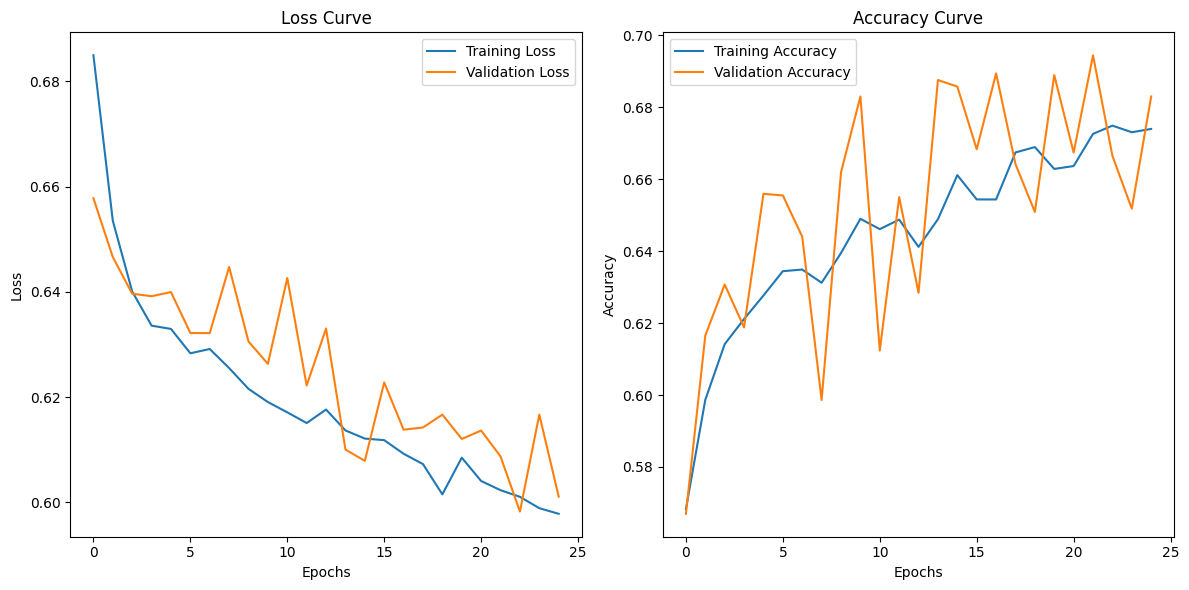

In [12]:
import matplotlib.pyplot as plt

# Extract history data
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


85/85 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step


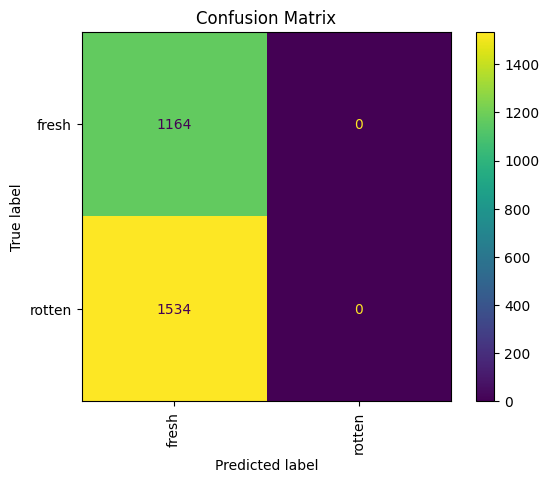

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = test_generator.classes  # True labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(test_generator.num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

       fresh       0.43      1.00      0.60      1164
      rotten       0.00      0.00      0.00      1534

    accuracy                           0.43      2698
   macro avg       0.22      0.50      0.30      2698
weighted avg       0.19      0.43      0.26      2698



/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera